In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./conocete.csv')
df.head()

,ID,¿Cuál es tu fecha de nacimiento?,¿Con qué género te identificas?,¿Perteneces a la comunidad LGBT+?,¿Cuál es tu situación emocional?,¿Con quién vives?,¿Has sido diagnosticado con algún padecimiento de salud mental y sigue siendo un tema para ti?,¿Eres estudiante?,¿Qué estudias y en qué semestre vas?,"¿Consideras que actualmente presentas dificultades en tus estudios? Si la respuesta es *positiva*, describe por qué",...,En mi trabajo me siento lleno de energía.,Soy fuerte y energético en mi trabajo.,Estoy entusiasmado con mi trabajo.,Mi trabajo me inspira.,Cuando me levanto por las mañanas tengo ganas de ir a trabajar.,Soy feliz cuando estoy absorto en mi trabajo.,Estoy orgulloso del trabajo que hago.,Estoy inmerso en mi trabajo.,"Me ""dejo llevar"" por mi trabajo.",Tu consentimiento es *importante*. Te compartimos nuestro *Acuerdo de Confidencialidad.*
0,1001,9/13/1934,Femenino,No,Soltero,Vivo solo,"Sí, sigue siendo un tema importante",No,Nada,No estudio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,1002,10/16/2001,Masculino,No,Soltero,Con mis papás,No tengo padecimientos de salud mental,Sí,"Ingeniería Industrial, 6to Semestre","No me logro organizar de la manera adecuada, m...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,1003,9/30/1992,Femenino,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Ni aplica,No aplica,...,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Casi nunca,True
3,1004,1/16/2001,Femenino,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante",No,Nada,No,...,Regularmente,Regularmente,Algunas veces,Algunas veces,Algunas veces,Casi nunca,Casi nunca,Algunas veces,Algunas veces,True
4,1005,1/9/2024,Femenino,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental,No,No soy estudiante,No soy estudiante,...,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Siempre,Casi siempre,Bastantes veces,True


In [ ]:
df.drop(['¿Eres colaborador de la Uni?', "¿Qué tan a menudo has experimentado *dos o más* de los siguientes síntomas *juntos*?" ,'Tu consentimiento es *importante*. Te compartimos nuestro *Acuerdo de Confidencialidad.*'], axis=1, inplace=True)
df.shape

(49, 56)

In [ ]:
cls = df.columns.to_list()

In [ ]:
new_cls = {
    'ID': 'id',
    '¿Cuál es tu fecha de nacimiento?': 'date_birth',
    '¿Con qué género te identificas?': 'genre',
    '¿Perteneces a la comunidad LGBT+?': 'LGBT+',
    '¿Cuál es tu situación emocional?': 'status',
    '¿Con quién vives?': 'living_with',
    '¿Has sido diagnosticado con algún padecimiento de salud mental y sigue siendo un tema para ti?': 'diagnosis',
    '¿Eres estudiante?': 'student',
    '¿Qué estudias y en qué semestre vas?': 'career',
    "¿Consideras que actualmente presentas dificultades en tus estudios? Si la respuesta es *positiva*, describe por qué": "student_problems",
    "¿Cuál es la emoción que ha predominado en ti?": 'emotion',
    "¿Has sentido ansiedad, nerviosismo o preocupación?": 'anxiety',
    "¿Qué tan a menudo has experimentado *dos o más* de los siguientes síntomas *juntos*?": "feeling",
    "En *promedio*, ¿cuántos *días* a la semana realizaste actividad física? 🚴‍♂️": "workout",
    "¿Cuánta satisfacción has sentido con tu nivel de actividad física?": "avg_workout",
    "¿Qué tanto has cuidado tu alimentación?": 'feeding',
    "En *promedio*, ¿cuántas horas duermes *en las noches*? 😴": 'sleeping',
    "¿Cómo evaluarías tu calidad de sueño?": 'avg_sleep',
    "¿Has sentido depresión, ánimo bajo o poca capacidad de disfrutar?\n": 'depression',
    "¿Qué tanta presión sentiste al realizar tus responsabilidades?": 'pression'
    }

In [ ]:
hads = {
    cls[i]: f'hads_{i-18}' for i in range(19, 26)
}

phq9 = {
    cls[i]: f'phq9_{i-25}' for i in range(26, 34)
}

work = {
    '¿Actualmente estás trabajando?': 'working',
    '¿En qué área de tu empresa laboras?': 'area_work',
    '¿Cuál es tu modalidad de trabajo?': 'modality_work'
}

bsi = {
    cls[i]: f'bsi_{i-36}' for i in range(37, 47)
}

uwes = {
    cls[i]: f'uwes_{i-46}' for i in range(47, 56)
}

In [ ]:
new_cls.update(hads)
new_cls.update(phq9)
new_cls.update(work)
new_cls.update(bsi)
new_cls.update(uwes)
new_cls

df.rename(columns=new_cls, inplace=True)

In [ ]:
df.dtypes

id                   int64
date_birth          object
genre               object
LGBT+               object
status              object
living_with         object
diagnosis           object
student             object
career              object
student_problems    object
emotion             object
anxiety             object
workout              int64
avg_workout          int64
feeding              int64
sleeping             int64
avg_sleep            int64
depression          object
pression            object
hads_1              object
hads_2              object
hads_3              object
hads_4              object
hads_5              object
hads_6              object
hads_7              object
phq9_1              object
phq9_2              object
phq9_3              object
phq9_4              object
phq9_5              object
phq9_6              object
phq9_7              object
phq9_8              object
working             object
area_work           object
modality_work       object
b

## Limpieza de datos

In [ ]:
map_hads_1 = {
    'Todos los días': 3,
    'Muchas veces': 2,
    'A veces': 1,
    'Nunca': 0
}

# Caso hipotético de valores
map_hads_2 = {
    'Definitivamente, y es muy fuerte': 3,
    'Sí, pero no es muy fuerte': 2,
    'Un poco, pero no me preocupa': 1,
    'Nada': 0
}

map_hads_3 = {
    'La mayoría de las veces': 3,
    'Con bastante frecuencia': 2,
    'A veces, aunque no muy a menudo': 1,
    'Nunca': 0
}

map_hads_4 = {
    'Siempre': 3,
    'Por lo general': 2,
    'No muy a menudo': 1,
    'Nunca': 0
}

map_hads_5 = {
    'Siempre': 3,
    'Con bastante frecuencia': 2,
    'En ciertas ocasiones': 1,
    'Nunca': 0
}

map_hads_6 = {
    'Siempre': 3,
    'Bastante': 2,
    'No mucho': 1,
    'Nada': 0
}

map_hads_7 = {
    'Todo el tiempo': 3,
    'Bastante a menudo': 2,
    'Rara vez': 1,
    'Nunca': 0
}

hads_cls = [f'hads_{i}' for i in range(1, 8)]

df['hads_1'] = df['hads_1'].map(map_hads_1)
df['hads_2'] = df['hads_2'].map(map_hads_2)
df['hads_3'] = df['hads_3'].map(map_hads_3)
df['hads_4'] = df['hads_4'].map(map_hads_4)
df['hads_5'] = df['hads_5'].map(map_hads_5)
df['hads_6'] = df['hads_6'].map(map_hads_6)
df['hads_7'] = df['hads_7'].map(map_hads_7)
df[hads_cls].head()

,hads_1,hads_2,hads_3,hads_4,hads_5,hads_6,hads_7
0,3,3,3,1,1,1,1
1,1,1,2,1,1,1,1
2,3,3,3,0,2,3,3
3,2,3,3,1,2,2,2
4,2,2,2,2,1,1,1


In [ ]:
map_genre = {
    'Femenino': 1,
    'Masculino': 0
}

df['genre'] = df['genre'].map(map_genre)

In [ ]:
cls = df.columns.to_list()

In [ ]:
basic_cls = [ cls[i] for i in range(19)  ]
basic_cls

['id',
 'date_birth',
 'genre',
 'LGBT+',
 'status',
 'living_with',
 'diagnosis',
 'student',
 'career',
 'student_problems',
 'emotion',
 'anxiety',
 'workout',
 'avg_workout',
 'feeding',
 'sleeping',
 'avg_sleep',
 'depression',
 'pression']

In [ ]:
df['ValorTotalAnsiedad'] = df['hads_1'] + df['hads_2'] + df['hads_3'] + df['hads_4'] +df['hads_5'] + df['hads_6'] + df['hads_7']
df.head()

,id,date_birth,genre,LGBT+,status,living_with,diagnosis,student,career,student_problems,...,uwes_1,uwes_2,uwes_3,uwes_4,uwes_5,uwes_6,uwes_7,uwes_8,uwes_9,ValorTotalAnsiedad
0,1001,9/13/1934,1,No,Soltero,Vivo solo,"Sí, sigue siendo un tema importante",No,Nada,No estudio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
1,1002,10/16/2001,0,No,Soltero,Con mis papás,No tengo padecimientos de salud mental,Sí,"Ingeniería Industrial, 6to Semestre","No me logro organizar de la manera adecuada, m...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,1003,9/30/1992,1,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Ni aplica,No aplica,...,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Casi nunca,17
3,1004,1/16/2001,1,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante",No,Nada,No,...,Regularmente,Regularmente,Algunas veces,Algunas veces,Algunas veces,Casi nunca,Casi nunca,Algunas veces,Algunas veces,15
4,1005,1/9/2024,1,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental,No,No soy estudiante,No soy estudiante,...,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Siempre,Casi siempre,Bastantes veces,11


## HADS - Ansiedad

In [ ]:
hads_cls = [f'hads_{i}' for i in range(1, 8)]
hads_cls.insert(len(hads_cls), 'ValorTotalAnsiedad')

In [ ]:
anxiety_cls = basic_cls + hads_cls
anxiety_df = df[anxiety_cls]
anxiety_df.head()

,id,date_birth,genre,LGBT+,status,living_with,diagnosis,student,career,student_problems,...,depression,pression,hads_1,hads_2,hads_3,hads_4,hads_5,hads_6,hads_7,ValorTotalAnsiedad
0,1001,9/13/1934,1,No,Soltero,Vivo solo,"Sí, sigue siendo un tema importante",No,Nada,No estudio,...,La mayor parte del tiempo,Un poco,3,3,3,1,1,1,1,13
1,1002,10/16/2001,0,No,Soltero,Con mis papás,No tengo padecimientos de salud mental,Sí,"Ingeniería Industrial, 6to Semestre","No me logro organizar de la manera adecuada, m...",...,Algunas veces,Moderada,1,1,2,1,1,1,1,8
2,1003,9/30/1992,1,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Ni aplica,No aplica,...,Todo el tiempo,Mucha,3,3,3,0,2,3,3,17
3,1004,1/16/2001,1,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante",No,Nada,No,...,Todo el tiempo,Moderada,2,3,3,1,2,2,2,15
4,1005,1/9/2024,1,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental,No,No soy estudiante,No soy estudiante,...,Algunas veces,Moderada,2,2,2,2,1,1,1,11


In [ ]:
anxiety_df['ValorTotalAnsiedad'] = pd.cut(anxiety_df.ValorTotalAnsiedad, [0, 7, 10, 22], labels=['Bajo', 'Medio', 'Alto'])

<ipython-input-138-7b97953caf79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anxiety_df['ValorTotalAnsiedad'] = pd.cut(anxiety_df.ValorTotalAnsiedad, [0, 7, 10, 22], labels=['Bajo', 'Medio', 'Alto'])


In [ ]:
anxiety_df[['id', 'ValorTotalAnsiedad']].groupby(['ValorTotalAnsiedad']).count()

,id
ValorTotalAnsiedad,
Bajo,8
Medio,15
Alto,26


Text(0, 0.5, 'Número de casos')

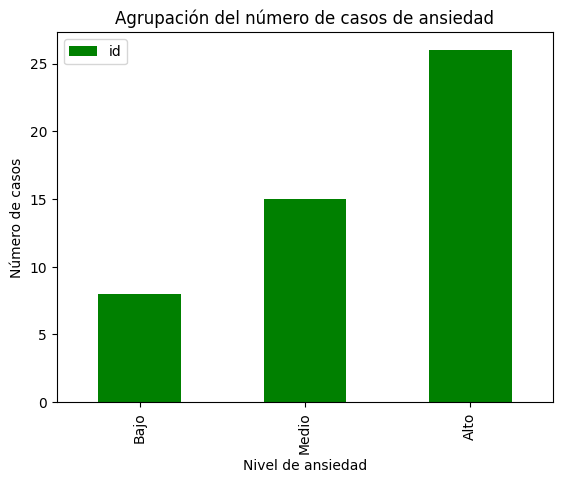

In [ ]:
colours = ['green', 'yellow', 'red']

anxiety_df[['id', 'ValorTotalAnsiedad']].groupby(['ValorTotalAnsiedad']).count().plot(kind='bar', color=colours)
plt.title('Agrupación del número de casos de ansiedad')
plt.xlabel('Nivel de ansiedad')
plt.ylabel('Número de casos')

In [ ]:
high_anxiety = anxiety_df.loc[anxiety_df['ValorTotalAnsiedad']=='Alto']
high_anxiety.shape

(26, 27)

Text(0, 0.5, 'N. casos de ansiedad')

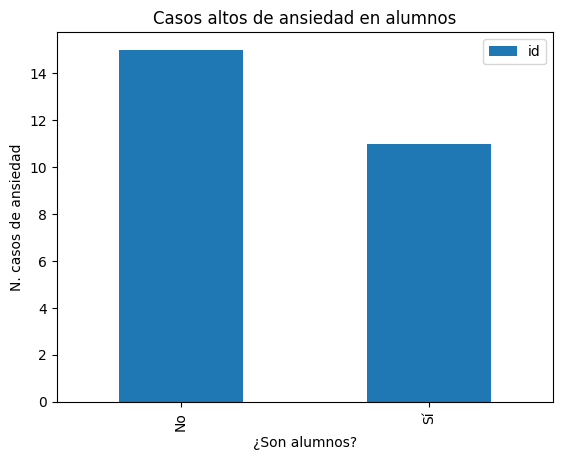

In [ ]:
high_anxiety[['id', 'student']].groupby(['student']).count().plot.bar()
plt.title('Casos altos de ansiedad en alumnos')
plt.xlabel('¿Son alumnos?')
plt.ylabel('N. casos de ansiedad')

Text(0, 0.5, 'N. casos de ansiedad')

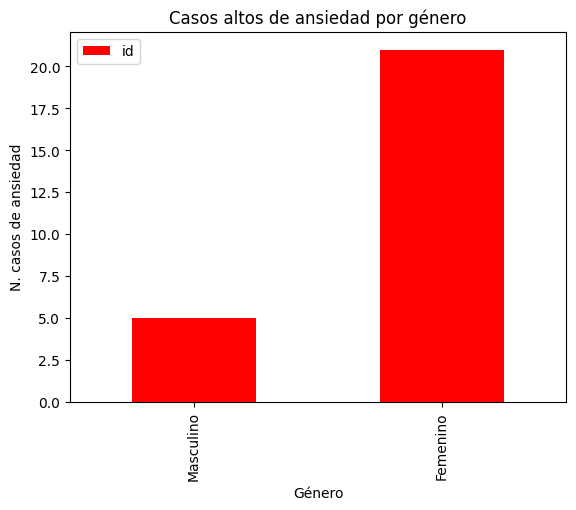

In [ ]:
high_anxiety[['id', 'genre']].groupby(['genre']).count().plot.bar(color='red').set_xticklabels(labels=['Masculino', 'Femenino'])
plt.title('Casos altos de ansiedad por género')
plt.xlabel('Género')
plt.ylabel('N. casos de ansiedad')

## PHQ9 - Depresión

In [ ]:
map_phq9 = {
    'Casi todos los días': 3,
    'Más de la mitad de los días (de 7 a 11 días)': 2,
    'Varios días (de 1 a 6 días)': 1,
    'Ningún día': 0
}

phq9_cls = [f'phq9_{i}' for i in range(1, 9)]

df['phq9_1'] = df['phq9_1'].map(map_phq9)
df['phq9_2'] = df['phq9_2'].map(map_phq9)
df['phq9_3'] = df['phq9_3'].map(map_phq9)
df['phq9_4'] = df['phq9_4'].map(map_phq9)
df['phq9_5'] = df['phq9_5'].map(map_phq9)
df['phq9_6'] = df['phq9_6'].map(map_phq9)
df['phq9_7'] = df['phq9_7'].map(map_phq9)
df['phq9_8'] = df['phq9_8'].map(map_phq9)
df[phq9_cls]

,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8
0,2,2,2,2,2,0,2,1
1,1,1,1,1,1,1,1,2
2,3,3,3,3,3,3,3,3
3,2,3,3,3,3,3,3,3
4,0,1,1,1,1,2,2,0
5,1,1,2,3,3,2,3,3
6,1,2,2,3,2,3,2,1
7,1,1,2,2,1,0,0,0
8,1,1,2,2,3,3,3,2
9,1,1,1,1,0,1,1,0


In [ ]:
df['ValorTotalDepresión'] = df['phq9_1'] + df['phq9_2'] + df['phq9_3'] + df['phq9_4'] +df['phq9_5'] + df['phq9_6'] + df['phq9_7'] + df['phq9_8']
df.head()

,id,date_birth,genre,LGBT+,status,living_with,diagnosis,student,career,student_problems,...,uwes_2,uwes_3,uwes_4,uwes_5,uwes_6,uwes_7,uwes_8,uwes_9,ValorTotalAnsiedad,ValorTotalDepresión
0,1001,9/13/1934,1,No,Soltero,Vivo solo,"Sí, sigue siendo un tema importante",No,Nada,No estudio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13
1,1002,10/16/2001,0,No,Soltero,Con mis papás,No tengo padecimientos de salud mental,Sí,"Ingeniería Industrial, 6to Semestre","No me logro organizar de la manera adecuada, m...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,9
2,1003,9/30/1992,1,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Ni aplica,No aplica,...,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Casi nunca,17,24
3,1004,1/16/2001,1,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante",No,Nada,No,...,Regularmente,Algunas veces,Algunas veces,Algunas veces,Casi nunca,Casi nunca,Algunas veces,Algunas veces,15,23
4,1005,1/9/2024,1,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental,No,No soy estudiante,No soy estudiante,...,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Siempre,Casi siempre,Bastantes veces,11,8


In [ ]:
phq9_cls.insert(len(phq9_cls), 'ValorTotalDepresión')
depression_cls = basic_cls + phq9_cls
depression_df = df[depression_cls]
depression_df.head()

,id,date_birth,genre,LGBT+,status,living_with,diagnosis,student,career,student_problems,...,pression,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,ValorTotalDepresión
0,1001,9/13/1934,1,No,Soltero,Vivo solo,"Sí, sigue siendo un tema importante",No,Nada,No estudio,...,Un poco,2,2,2,2,2,0,2,1,13
1,1002,10/16/2001,0,No,Soltero,Con mis papás,No tengo padecimientos de salud mental,Sí,"Ingeniería Industrial, 6to Semestre","No me logro organizar de la manera adecuada, m...",...,Moderada,1,1,1,1,1,1,1,2,9
2,1003,9/30/1992,1,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Ni aplica,No aplica,...,Mucha,3,3,3,3,3,3,3,3,24
3,1004,1/16/2001,1,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante",No,Nada,No,...,Moderada,2,3,3,3,3,3,3,3,23
4,1005,1/9/2024,1,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental,No,No soy estudiante,No soy estudiante,...,Moderada,0,1,1,1,1,2,2,0,8


In [ ]:
depression_df['ValorTotalDepresión'] = pd.cut(depression_df.ValorTotalDepresión, [0, 7, 15, 25], labels=['Bajo', 'Medio', 'Alto'])
depression_df.head()

<ipython-input-147-624768e60729>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_df['ValorTotalDepresión'] = pd.cut(depression_df.ValorTotalDepresión, [0, 7, 15, 25], labels=['Bajo', 'Medio', 'Alto'])


,id,date_birth,genre,LGBT+,status,living_with,diagnosis,student,career,student_problems,...,pression,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,ValorTotalDepresión
0,1001,9/13/1934,1,No,Soltero,Vivo solo,"Sí, sigue siendo un tema importante",No,Nada,No estudio,...,Un poco,2,2,2,2,2,0,2,1,Medio
1,1002,10/16/2001,0,No,Soltero,Con mis papás,No tengo padecimientos de salud mental,Sí,"Ingeniería Industrial, 6to Semestre","No me logro organizar de la manera adecuada, m...",...,Moderada,1,1,1,1,1,1,1,2,Medio
2,1003,9/30/1992,1,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Ni aplica,No aplica,...,Mucha,3,3,3,3,3,3,3,3,Alto
3,1004,1/16/2001,1,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante",No,Nada,No,...,Moderada,2,3,3,3,3,3,3,3,Alto
4,1005,1/9/2024,1,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental,No,No soy estudiante,No soy estudiante,...,Moderada,0,1,1,1,1,2,2,0,Medio


Text(0, 0.5, 'Número de casos')

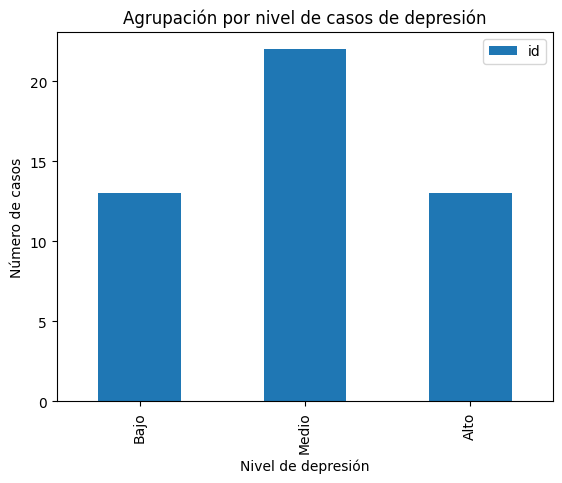

In [ ]:
depression_df[['id', 'ValorTotalDepresión']].groupby(['ValorTotalDepresión']).count().plot(kind='bar')
plt.title('Agrupación por nivel de casos de depresión')
plt.xlabel('Nivel de depresión')
plt.ylabel('Número de casos')

In [ ]:
high_depression = depression_df.loc[depression_df['ValorTotalDepresión']=='Alto']
high_depression.shape

(13, 28)

Text(0, 0.5, 'N. casos de depresión')

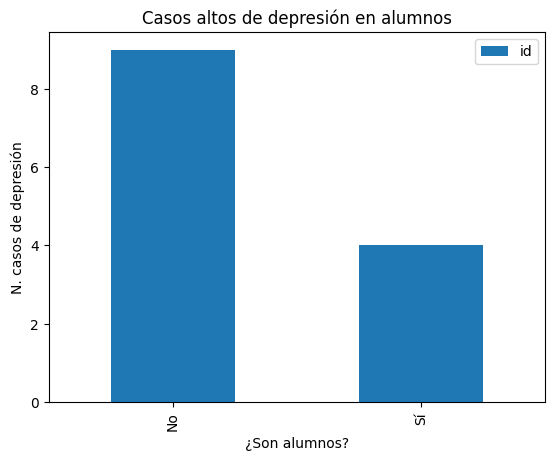

In [ ]:
high_depression[['id', 'student']].groupby(['student']).count().plot.bar()
plt.title('Casos altos de depresión en alumnos')
plt.xlabel('¿Son alumnos?')
plt.ylabel('N. casos de depresión')

Text(0, 0.5, 'N. casos de depresión')

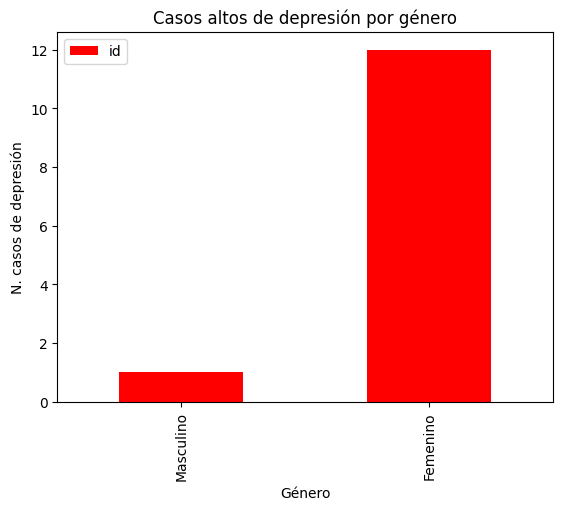

In [ ]:
high_depression[['id', 'genre']].groupby(['genre']).count().plot.bar(color='red').set_xticklabels(labels=['Masculino', 'Femenino'])
plt.title('Casos altos de depresión por género')
plt.xlabel('Género')
plt.ylabel('N. casos de depresión')

## BSI - Estrés

In [ ]:
workers_df = df.loc[df['working'] == 'Sí']

array(['Un par de veces al mes', 'Nunca', 'Varias veces al año',
       'Varias veces a la semana', 'Una vez al mes'], dtype=object)

In [ ]:
map_bsi = {
    'Nunca' : 0,
    "Varias veces al año": 1,
    "Una vez al mes": 2,
    "Un par de veces al mes": 3,
    "Una vez a la semana": 4,
    "Varias veces a la semana": 5,
    "Todos los días": 6
}

bsi_cls = [f'bsi_{i}' for i in range(1, 11)]

workers_df['bsi_1'] = workers_df['bsi_1'].map(map_bsi)
workers_df['bsi_2'] = workers_df['bsi_2'].map(map_bsi)
workers_df['bsi_3'] = workers_df['bsi_3'].map(map_bsi)
workers_df['bsi_4'] = workers_df['bsi_4'].map(map_bsi)
workers_df['bsi_5'] = workers_df['bsi_5'].map(map_bsi)
workers_df['bsi_6'] = workers_df['bsi_6'].map(map_bsi)
workers_df['bsi_7'] = workers_df['bsi_7'].map(map_bsi)
workers_df['bsi_8'] = workers_df['bsi_8'].map(map_bsi)
workers_df['bsi_9'] = workers_df['bsi_9'].map(map_bsi)
workers_df['bsi_10'] = workers_df['bsi_10'].map(map_bsi)

In [ ]:
workers_df['ValorTotalEstrés'] = workers_df['bsi_1'] + workers_df['bsi_2'] + workers_df['bsi_3'] + workers_df['bsi_4'] + workers_df['bsi_5'] + workers_df['bsi_6'] + workers_df['bsi_7'] + workers_df['bsi_8'] + workers_df['bsi_9'] + workers_df['bsi_10']

<ipython-input-155-c33e2bab117f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workers_df['ValorTotalEstrés'] = workers_df['bsi_1'] + workers_df['bsi_2'] + workers_df['bsi_3'] + workers_df['bsi_4'] + workers_df['bsi_5'] + workers_df['bsi_6'] + workers_df['bsi_7'] + workers_df['bsi_8'] + workers_df['bsi_9'] + workers_df['bsi_10']


In [ ]:
bsi_cls.insert(len(phq9_cls), 'ValorTotalEstrés')
burnout_cls = basic_cls + bsi_cls
burnout_df = workers_df[burnout_cls]
burnout_df.head()

,id,date_birth,genre,LGBT+,status,living_with,diagnosis,student,career,student_problems,...,bsi_2,bsi_3,bsi_4,bsi_5,bsi_6,bsi_7,bsi_8,bsi_9,ValorTotalEstrés,bsi_10
2,1003,9/30/1992,1,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Ni aplica,No aplica,...,3,0,0,0,3,0,0,6,18,6
3,1004,1/16/2001,1,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante",No,Nada,No,...,0,3,4,6,4,3,3,4,35,5
4,1005,1/9/2024,1,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental,No,No soy estudiante,No soy estudiante,...,1,0,0,4,5,5,3,5,26,3
5,1006,8/30/1995,1,No,Vivo con mi pareja,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Administración de empresas 7mo semestre,No acabe mis estudios por mi decisión de ser m...,...,5,4,2,3,5,5,5,3,39,4
8,1009,8/21/1999,1,No,En una relación,Tengo roomies,"No tengo un diagnóstico, pero considero que sí",No,"Odontología, culminado","Sí, siento que estoy estancada y que no me con...",...,2,1,1,0,3,3,3,0,16,3


In [ ]:
burnout_df['ValorTotalEstrés'] = pd.cut(burnout_df.ValorTotalEstrés, [0, 29, 39, 49, 71], labels=['Poco Probable', 'Leve', 'Moderado', 'Grave'])
burnout_df.head()

<ipython-input-157-643f606b1461>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burnout_df['ValorTotalEstrés'] = pd.cut(burnout_df.ValorTotalEstrés, [0, 29, 39, 49, 71], labels=['Poco Probable', 'Leve', 'Moderado', 'Grave'])


,id,date_birth,genre,LGBT+,status,living_with,diagnosis,student,career,student_problems,...,bsi_2,bsi_3,bsi_4,bsi_5,bsi_6,bsi_7,bsi_8,bsi_9,ValorTotalEstrés,bsi_10
2,1003,9/30/1992,1,No,Casado,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Ni aplica,No aplica,...,3,0,0,0,3,0,0,6,Poco Probable,6
3,1004,1/16/2001,1,No,Soltero,Con mis papás,"Sí, sigue siendo un tema importante",No,Nada,No,...,0,3,4,6,4,3,3,4,Leve,5
4,1005,1/9/2024,1,No lo sé,Casado,Con mi familia (pareja e hijos),No tengo padecimientos de salud mental,No,No soy estudiante,No soy estudiante,...,1,0,0,4,5,5,3,5,Poco Probable,3
5,1006,8/30/1995,1,No,Vivo con mi pareja,Con mi familia (pareja e hijos),"No tengo un diagnóstico, pero considero que sí",No,Administración de empresas 7mo semestre,No acabe mis estudios por mi decisión de ser m...,...,5,4,2,3,5,5,5,3,Leve,4
8,1009,8/21/1999,1,No,En una relación,Tengo roomies,"No tengo un diagnóstico, pero considero que sí",No,"Odontología, culminado","Sí, siento que estoy estancada y que no me con...",...,2,1,1,0,3,3,3,0,Poco Probable,3
